# Create Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [2]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    #create sample_size*n_features with x_min and x_max
    #put this features in a 1x2 vector 
    finalNpArray = []
    
    #ihc kann eine range schleife eerstellen die in jedem durchgang ein np array mit n feature vectros erstellt
    for i in range(sample_size):
        x = 0
        x = np.random.uniform(x_min, x_max, n_features)
        x = x.tolist()
        finalNpArray.append(x)
    arr = np.array(finalNpArray)
        
    return arr
    
    raise NotImplementedError("You should implement this!")

In [3]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[ 8.58126749,  4.0924022 ],
       [10.54507259,  4.4620938 ],
       [ 4.52784029,  4.24464814],
       [ 2.07043196,  2.60927988],
       [ 3.39123908, -0.11997193],
       [ 7.11646968,  3.27888447],
       [ 5.38924202,  2.41790698],
       [ 6.09939829,  4.40881084],
       [ 4.44005653,  0.68321817],
       [ 4.45441099,  3.95850412],
       [ 3.95264303,  0.88877676],
       [ 5.22341795,  1.44498329],
       [ 9.78661694,  4.39723425],
       [ 9.47853817,  3.76107242],
       [ 8.99640239,  1.59153167],
       [ 7.54784984,  1.71173406],
       [ 3.92989476,  4.82466799],
       [ 6.36693298,  2.71065138],
       [ 6.54880995,  1.61513522],
       [10.21340531,  3.09759498],
       [10.87664814,  3.66407717],
       [ 9.2918343 ,  1.24393273],
       [ 9.67013365,  1.26776164],
       [ 7.36998128,  2.4993466 ],
       [ 3.82901347,  0.32431077],
       [ 9.66784079,  2.4309231 ],
       [ 8.50888292,  4.08036445],
       [ 5.03804838,  2.25124133],
       [ 7.68335313,

In [4]:
assert len(X[:,0]) == sample_size
assert len(X[0,:]) == n_features
for i in range(n_features):
    assert np.max(X[:,i]) <= x_max[i]
    assert np.min(X[:,i]) >= x_min[i]

# Linear Hypothesis

In [5]:
def linear_hypothesis(thetas):
    return lambda x: np.sum(thetas*np.insert(x, 0, 1, axis=1), axis=1)
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    raise NotImplementedError("You should implement this!")

In [6]:
linearHypothesisLambda = linear_hypothesis([.1,.2,.3])

linearHypothesisLambda(X)

array([3.04397416, 3.54764266, 2.2789625 , 1.29687036, 0.74225624,
       2.50695928, 1.9032205 , 2.64252291, 1.19297676, 2.17843343,
       1.15716163, 1.57817858, 3.37649366, 3.12402936, 2.37673998,
       2.12309019, 2.33337935, 2.18658201, 1.89430256, 3.07195956,
       3.37455278, 2.33154668, 2.41435522, 2.32380023, 0.96309593,
       2.76284509, 3.02588592, 1.78298208, 2.87732371, 1.28055524,
       0.58446271, 2.07822709, 2.54625756, 0.57200296, 2.98818997,
       2.2493967 , 0.89576454, 1.10827349, 1.66148308, 0.75487357,
       2.10511877, 1.44280841, 3.21964716, 2.95635023, 1.59342479,
       2.28628068, 1.45971361, 2.40161645, 1.55194187, 2.35563802,
       2.27002951, 2.47648213, 0.83519878, 1.8269547 , 2.08029992,
       2.38621959, 1.77447385, 2.24043584, 2.39685514, 1.98411429,
       1.53529767, 3.27612478, 1.61108107, 2.36843081, 1.06394483,
       2.33397958, 2.97498171, 2.42529568, 2.01336765, 2.51882728,
       2.05369052, 3.28846876, 1.86919179, 1.31044274, 2.48664

In [7]:
assert (len(linear_hypothesis([.1,.2,.3])(X))) == sample_size

# Generate Target Values

In [8]:
def generate_targets(X, theta, sigma):
    #y = das ergebnis meiner linear hypothesis
    #was ist gaussian noise?
    lH = linear_hypothesis(theta)(X)
    noise = np.random.normal(0, sigma, lH.shape)
    y = lH+noise
    return y
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        
    Returns:
        target values for X
    '''
    raise NotImplementedError("You should implement this!")

In [9]:
theta = (2., 3., -4.)
#why do we use here so much noise?
sigma = 3.
y = generate_targets(X, theta, sigma)
print(y)

[ 13.58777423  19.43331432  -2.39717897   2.69759741  13.14949371
  10.84122267   6.52428527  -0.95294393  13.12416044  -1.75068968
  16.69336297   9.72884695  14.52466059  15.60005602  21.16765535
  16.81369649  -4.53143481   9.1795461   17.7527216   17.561412
  17.33684209  24.78067731  23.87083685  13.582131     9.29032306
  19.14545501  12.17485831   9.81604261  12.14446345   3.2537483
   5.53025881  27.82423039  33.49463596   3.64807954   4.11185644
  15.71042615   4.60404188  21.08689772   6.68832782  13.67513356
  36.41155539   2.14608397   5.74594473   1.44054323   3.2331568
  21.1036313   10.98500965  -6.42959315  -1.47108445  11.81825673
  32.72427524  -0.06907202   8.72761782  16.14396234  -1.77436173
  32.61496321  12.56682309  -3.72211537  18.98730256  20.13551534
   7.66083717  11.2423817   19.16940651  20.68006729  17.04166724
   9.77235403  20.00372174  10.25874489  -6.01607164   4.03778059
 -10.905801    24.08187691  19.88113278  -2.58628754  12.69253339
  11.86023157 

In [10]:
assert len(y) == sample_size

# Plot the data

In [25]:
%matplotlib notebook
import random

def plot_data_scatter(features, targets):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(features[:,0], features[:,1], targets)
    return plt.show()
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    raise NotImplementedError("You should implement this!")

<IPython.core.display.Javascript object>


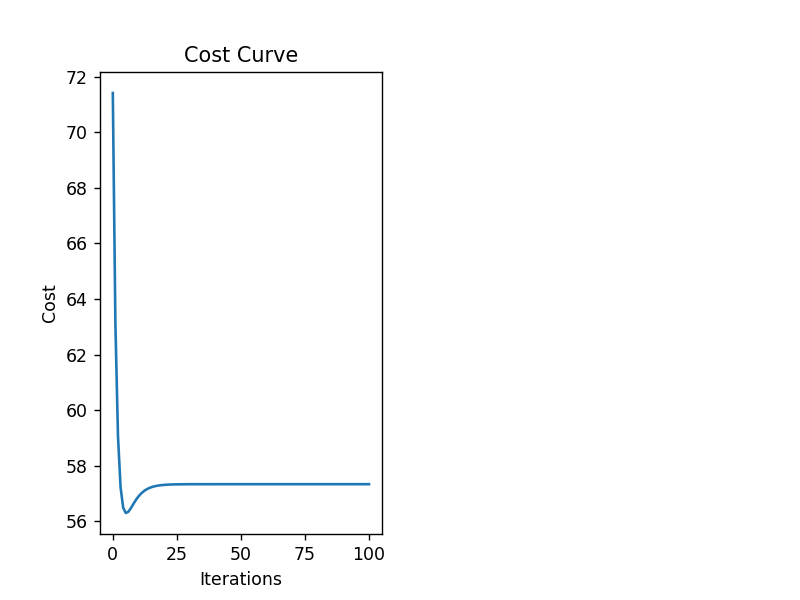

In [26]:
plot_data_scatter(X, y) 

# Cost Function

In [11]:
def mse_cost_function(x, y):   
    return lambda theta: 1/(2*(len(x)))*(sum((linear_hypothesis(theta)(x)-y)**2))
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    raise NotImplementedError("You should implement this!")

In [12]:
print(mse_cost_function(X, y)(theta))


3.423785744604156


# Gradient Descent

In [13]:
def update_theta2(x, y, theta, learning_rate):
    x2 = x
    numbers = []
    for i in theta:
        numbers.append(i)
    x2 = np.insert(x2, 0, 1, axis=1)
    for i in range(len(x2)):
        for j in range(len(numbers)):
            numbers[j] = numbers[j] - (learning_rate * ((1 / 1*len(x))* (sum((linear_hypothesis(theta)(x)-y)*x2[i][j]))))
    return numbers

In [14]:
def update_theta(x, y, theta, learning_rate):
    x2 = x
    numbers = []
    for i in theta:
        numbers.append(i)
    x2 = np.insert(x2, 0, 1, axis=1)
    for j in range(len(numbers)):
        for i in range(len(x2)):
            temp = sum((linear_hypothesis(theta)(x)-y)*x2[i][j])
        numbers[j] = numbers[j] - (learning_rate * temp)
    return numbers

            

In [15]:
print(update_theta(X, y, theta, 0.0003))

[2.0160742241432628, 3.0341312263043485, -3.926582430295719]


In [16]:
def gradient_descent(learning_rate, theta, iterations, x, y, cost_function):
    cost_hist = []
    theta_hist = []
    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)
        theta_hist.append(theta)
        cost_hist.append(cost_function(x, y)(theta))
    return cost_hist, theta_hist
    ''' Minimize theta values of a linear model based on MSE cost function
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this!")

In [17]:
# Your implementation:
t0 = np.random.random()
t1 = np.random.random()
t2 = np.random.random()
alpha = 0.0001# assign an appropriate value
nb_iterations = 100# assign an appropriate value
start_values_theta = [t0, t1, t2] # assign appropriate values
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y,  mse_cost_function)

In [27]:
def plot_progress(costs):
    plt.figure(1, figsize=(17,7))
    plt.subplot(121)
    plt.subplots_adjust(wspace = 0.2)
    plt.plot(np.linspace(0, len(costs), len(costs)), costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Curve')
    return plt.show()

In [28]:
print(plot_progress(history_cost))
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

None
costs before the training:	  71.41415838705706
costs after the training:	  57.337513035844914


In [29]:
def evaluation_plt(x, y, final_theta):
    #np.insert(x, 0, 1, axis=1)
    #y = np.array(y)
    #final_theta = np.array(final_theta)
    fig = plt.figure()
    ax = Axes3D(fig)
    #ax.scatter(x[:,0], x[:,1], y)
   
    z = (-final_theta[0] * x[:,0] - final_theta[1] * x[:,1] - y) * 1. / final_theta[2]
    print(z)

    ax.plot_surface(x[:,0], x[:,1], z)

    
    
    
    return plt.show()
    ''' Plots the data x, y together with the final model
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar, model parameter for boundary
        theta_1: scalar, model parameter for boundary
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    raise NotImplementedError("You should implement this!") 

<IPython.core.display.Javascript object>


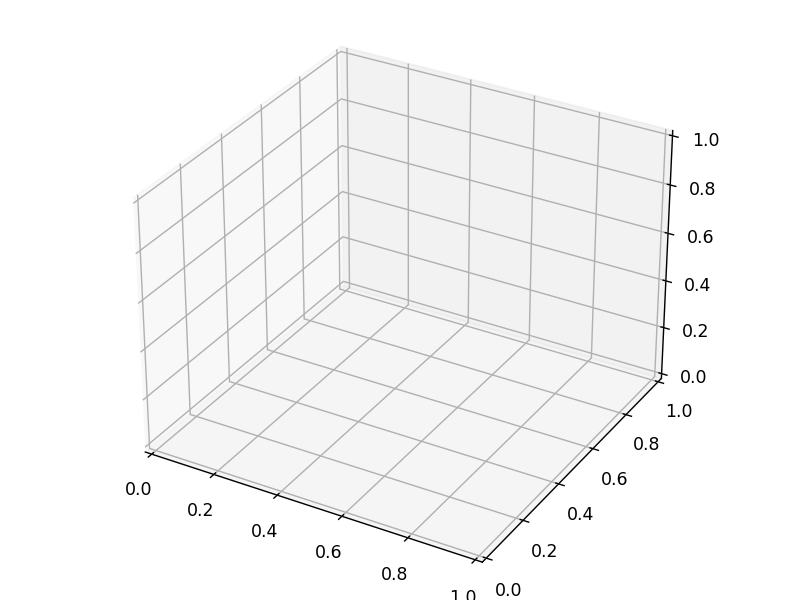

[-12.89259319 -17.06364443  -2.59273596  -3.69479149  -8.49533983
 -10.38704159  -6.88126887  -4.03782256  -9.29289401  -2.77042139
 -11.24827206  -8.0803469  -14.00534532 -14.14700786 -15.89444411
 -13.0147105   -1.51232816  -8.87547206 -13.14501435 -15.1303908
 -15.55032766 -17.83309308 -17.46483051 -11.57816093  -6.7247255
 -15.45933651 -12.06620482  -8.51841106 -11.79613017  -3.97020319
  -3.94857084 -19.05717743 -23.08892467  -2.87741262  -7.50492333
 -12.65457757  -4.01499264 -13.58019454  -6.56436904  -8.81252704
 -23.91011255  -3.61236074  -8.81872629  -5.9495036   -4.50292567
 -15.68367537  -8.57024109  -0.55885036  -1.80483074 -10.62281888
 -22.13603093  -4.26579134  -6.18407449 -12.10823239  -2.5985336
 -22.3325706  -10.0285081   -1.81454209 -14.72333805 -14.62438774
  -6.847222   -11.98753431 -13.40019363 -15.61645165 -11.2546192
  -9.45727414 -16.3590046   -9.92298236  -0.09199087  -6.62438383
   2.55649949 -19.18417769 -14.26894418  -0.75680886 -11.38995228
 -11.51646774 

ValueError: Argument Z must be 2-dimensional.

In [30]:
evaluation_plt(X, y, history_theta[-1])
print("thetas before the training:\t", history_theta[0])
print("thetas after the training:\t", history_theta[-1])